In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

sns.set(style="darkgrid")


In [2]:
namen = tuple(map('rapport{}.tsv'.format, range(1, 6)))
rapporten = [pd.read_csv(naam, '\t').drop('max', 'columns') for naam  in namen]
data = pd.concat(rapporten, keys=namen)

#display(data)


## Verwerking

Ik wil de evolutie zien van de positie in de klas.  Per vak, en 'overall'.



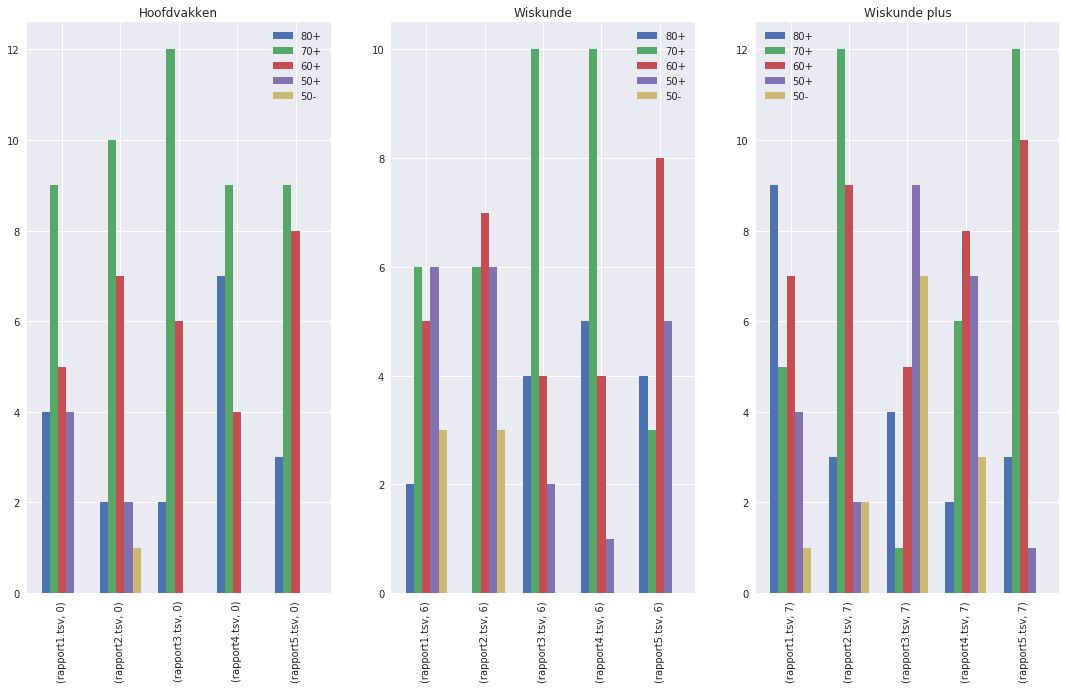

In [11]:
def vak(data, naam):
    return data.icol["Wiskunde", :]
per_vak = data.groupby("Vakken")
wiskunde = pd.concat(map(per_vak.get_group, ['Wiskunde', 'Wiskunde plus'])).sort_index()

#wiskunde.loc[:, ("punt", "gem")]
vakken = ['Hoofdvakken', 'Wiskunde', 'Wiskunde plus']
fig, axs = plt.subplots(1, len(vakken))
fig.set_size_inches(18.5, 10.5, forward=True)
for ax, vak in zip(axs, vakken):
    per_vak.get_group(vak).plot.bar(title=vak, ax=ax, width=.7)
